# imports of relevant scripts

In [3]:
import os
import sys
import shutil
import math
import warnings
from typing import *
from enum import Enum
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sys.path.append("/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/UpdatedCellDeathQuantification/CellDeathQuantification/QuantificationScripts")
from QuantificationScripts.NucleationAndPropagationMeasurements import *
from OldCodeBase_15072021.NucliatorsCount import NucleatorsCounter 
from OldCodeBase_15072021.NucleationProbabilityAndSPI import NucleationProbabilityAndSPI 
from RegenratingPreviousResultsScripts.PreviousResultsUtils import *

In [4]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_full_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/20160820_10A_FB_xy13.csv"
cells_locis, cells_tods = read_experiment_cell_xy_and_death_times(exp_full_path=exp_full_path)
exp_name = '20160820_10A_FB_xy11.csv'
exp_treatment, exp_temporal_resolution = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name,
                                                                                            meta_data_file_full_path=meta_data_file_full_path)


In [ ]:
from QuantificationScripts.SPICalculator import *
nuc_p_spi = SPICalculator(XY=cells_locis,
                                        die_times=cells_tods,
                                        temporal_resolution=exp_temporal_resolution,
                                        treatment=exp_treatment,
                                        n_scramble=1000,
                                        draw=False,
                                        dist_threshold_nucliators_detection=200)
print(nuc_p_spi.get_spis())

# SPI vs. NI

In [6]:
#OLD DATA
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:95,1]
# NEW DATA
exps_dir_name_new = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path_new= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names_new= pd.read_csv(meta_data_file_full_path_new)
exp_names_new = meta_data_extract_exp_names_new.iloc[8:12,1]

In [ ]:
all_new_experiments_spi_and_ni_regeneration = calc_all_experiments_SPI_and_NI_for_landscape(list(exp_names_new),exps_dir_path=exps_dir_name_new,meta_data_full_file_path=meta_data_file_full_path_new)
reformatting_all_new_experiments_spi_and_ni_regeneration = {"Experiment_name":[],
                                                                "SPI":[],
                                                                "NI":[],
                                                                "Treatment":[],
                                                                "Cell Line + Treatment":[]}
for key,value in all_new_experiments_spi_and_ni_regeneration.items():
    if value is None:
        continue
    reformatting_all_new_experiments_spi_and_ni_regeneration["Experiment_name"].append(key)
    exp_cell_line= meta_data_extract_exp_names_new[meta_data_extract_exp_names_new["File Name"]== key]["Cell Line"].values[0]
    reformatting_all_new_experiments_spi_and_ni_regeneration["SPI"].append(value[0])
    reformatting_all_new_experiments_spi_and_ni_regeneration["NI"].append(value[1])
    reformatting_all_new_experiments_spi_and_ni_regeneration["Cell Line + Treatment"].append(replace_ugly_long_name(key,exp_cell_line))
    reformatting_all_new_experiments_spi_and_ni_regeneration["Treatment"].append(replace_ugly_long_name(key))
    
    
    
all_previous_experiments_spi_and_ni_regeneration = calc_all_experiments_SPI_and_NI_for_landscape(list(exp_names),exps_dir_path=exps_dir_name,meta_data_full_file_path=meta_data_file_full_path)
reformatting_all_previos_experiments_spi_and_ni_regeneration = {"Experiment_name":[],
                                                                "SPI":[],
                                                                "NI":[],
                                                                "Treatment":[],
                                                                "Cell Line + Treatment":[]}
for key,value in all_previous_experiments_spi_and_ni_regeneration.items():
    if value is None:
        continue
    reformatting_all_previos_experiments_spi_and_ni_regeneration["Experiment_name"].append(key)
    exp_cell_line= meta_data_extract_exp_names[meta_data_extract_exp_names["File Name"]== key]["Cell Line"].values[0]
    reformatting_all_previos_experiments_spi_and_ni_regeneration["SPI"].append(value[0])
    reformatting_all_previos_experiments_spi_and_ni_regeneration["NI"].append(value[1])
    reformatting_all_previos_experiments_spi_and_ni_regeneration["Cell Line + Treatment"].append(replace_ugly_long_name(key,exp_cell_line))
    reformatting_all_previos_experiments_spi_and_ni_regeneration["Treatment"].append(replace_ugly_long_name(key))
    
    

all_SPI_NI_results={}
for key in reformatting_all_previos_experiments_spi_and_ni_regeneration.keys():
    all_SPI_NI_results [key] = reformatting_all_previos_experiments_spi_and_ni_regeneration[key]+reformatting_all_new_experiments_spi_and_ni_regeneration[key]

In [ ]:
all_SPI_NI_results={}
for key in reformatting_all_previos_experiments_spi_and_ni_regeneration.keys():
    all_SPI_NI_results [key] = reformatting_all_previos_experiments_spi_and_ni_regeneration[key]+reformatting_all_new_experiments_spi_and_ni_regeneration[key]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
reformatting_all_previos_experiments_spi_and_ni_regeneration_df = pd.DataFrame.from_dict(reformatting_all_previos_experiments_spi_and_ni_regeneration)
figure = sns.scatterplot(data=reformatting_all_previos_experiments_spi_and_ni_regeneration_df, x="NI", y="SPI", hue="Treatment", style="Treatment",palette = sns.color_palette("deep"))#,
                         #,edgecolors="grey", linewidth=2)
plt.setp(figure.get_legend().get_texts(), fontsize='5')
figure.set_xlim(0.0,0.6)
figure.set_xlim(0.0,0.6)
plt.show()

Figure_SPI = sns.stripplot(data=reformatting_all_previos_experiments_spi_and_ni_regeneration, x="Cell Line + Treatment", y="SPI"\
    ,  hue= "Cell Line + Treatment",palette = sns.color_palette("colorblind"), edgecolors="black"
    , jitter = 0.3, linewidth=1,
    order=["B16F10+C' dots", 'MCF10A+FB', 'MCF7+FB','U937+FB','HAP1+FB','HAP1 920 clone H+FB','HAP1+FAC&BSO+PEG', 'HAP1+erastin','MCF7+ML162', 'HAP1+ML162', 'MCF10A+TRAIL','U937+TSZ','MCF7+H2O2'])
Figure_SPI.tick_params(axis='x', rotation=90)
Figure_SPI.get_legend().remove()

Figure_SPI.set_ylim(-0.2,1.0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = sns.scatterplot(data=all_SPI_NI_results, x="NI", y="SPI", hue="Treatment", style="Treatment",palette = sns.color_palette("deep"))#,
                         #,edgecolors="grey", linewidth=2)
for SPI,NI in zip(reformatting_all_new_experiments_spi_and_ni_regeneration["SPI"],reformatting_all_new_experiments_spi_and_ni_regeneration["NI"]):
    plt.text(NI , SPI,"*")
plt.setp(figure.get_legend().get_texts(), fontsize='5')

Figure_SPI = sns.stripplot(data=all_SPI_NI_results, x="Cell Line + Treatment", y="SPI"\
    ,  hue= "Cell Line + Treatment",palette = sns.color_palette("colorblind"), edgecolors="black"
    , jitter = 0.3, linewidth=1,
    order=["B16F10+C' dots", 'MCF10A+FB', 'MCF7+FB','U937+FB','HAP1+FB','HAP1 920 clone H+FB','HAP1+FAC&BSO+PEG', 'HAP1+erastin','MCF7+ML162', 'HAP1+ML162', 'MCF10A+TRAIL','U937+TSZ','MCF7+H2O2',"MCF10A+FAC&BSO **"])
Figure_SPI.tick_params(axis='x', rotation=90)
Figure_SPI.get_legend().remove()

Figure_SPI.set_ylim(-0.2,1.0)
plt.show()



# Non-Randomality Factor

In [ ]:
experiments_main_dir_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = meta_data_extract_exp_names.iloc[:95,1]
# exp_names = list(filter(lambda x: x.endswith('.csv'), os.listdir(experiments_main_dir_path)))
root_results_dir = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/NewResults/NRF_1000_pertupation"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Results/NonRandomalityFactorResults"
exps_results_dicts = calc_factor_of_propagation_by_number_of_dead_neighbors_and_time_from_recent_neighbors_death(
    dir_path_to_save_nrf_plots=root_results_dir,
    exp_name=list(exp_names),
    exps_dir_path=experiments_main_dir_path,
    max_number_of_dead_neighbors_to_calc=5,
    max_delta_tod_from_recently_dead_neighbor=5,
    meta_data_full_file_path=meta_data_file_full_path,
    sliding_time_window_size=15, #change according to the treatment
    save_fig=True,
    show_fig=False,
    number_of_random_permutations=1000,
    include_only_treatments=["FAC", "PEG", "erastin", "h2o2", "C' dots", "ML162"],
    fig_v_min=1.,
    fig_v_max=3.
    )

# Sensitivity Analysis

#### investigating effects of sliding time window size -NI

Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.125
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
NI: 0.16355140186915887
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
NI: 0.15555555555555556
##############################
Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.1159090909090909
##############################
274 0.125 Dense
214 0.16355140186915887 Sparse
92 0.15555555555555556 Sparse
433 0.1159090909090909 Dense
Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.12828947368421054
##############################
Analyzing exp: 20

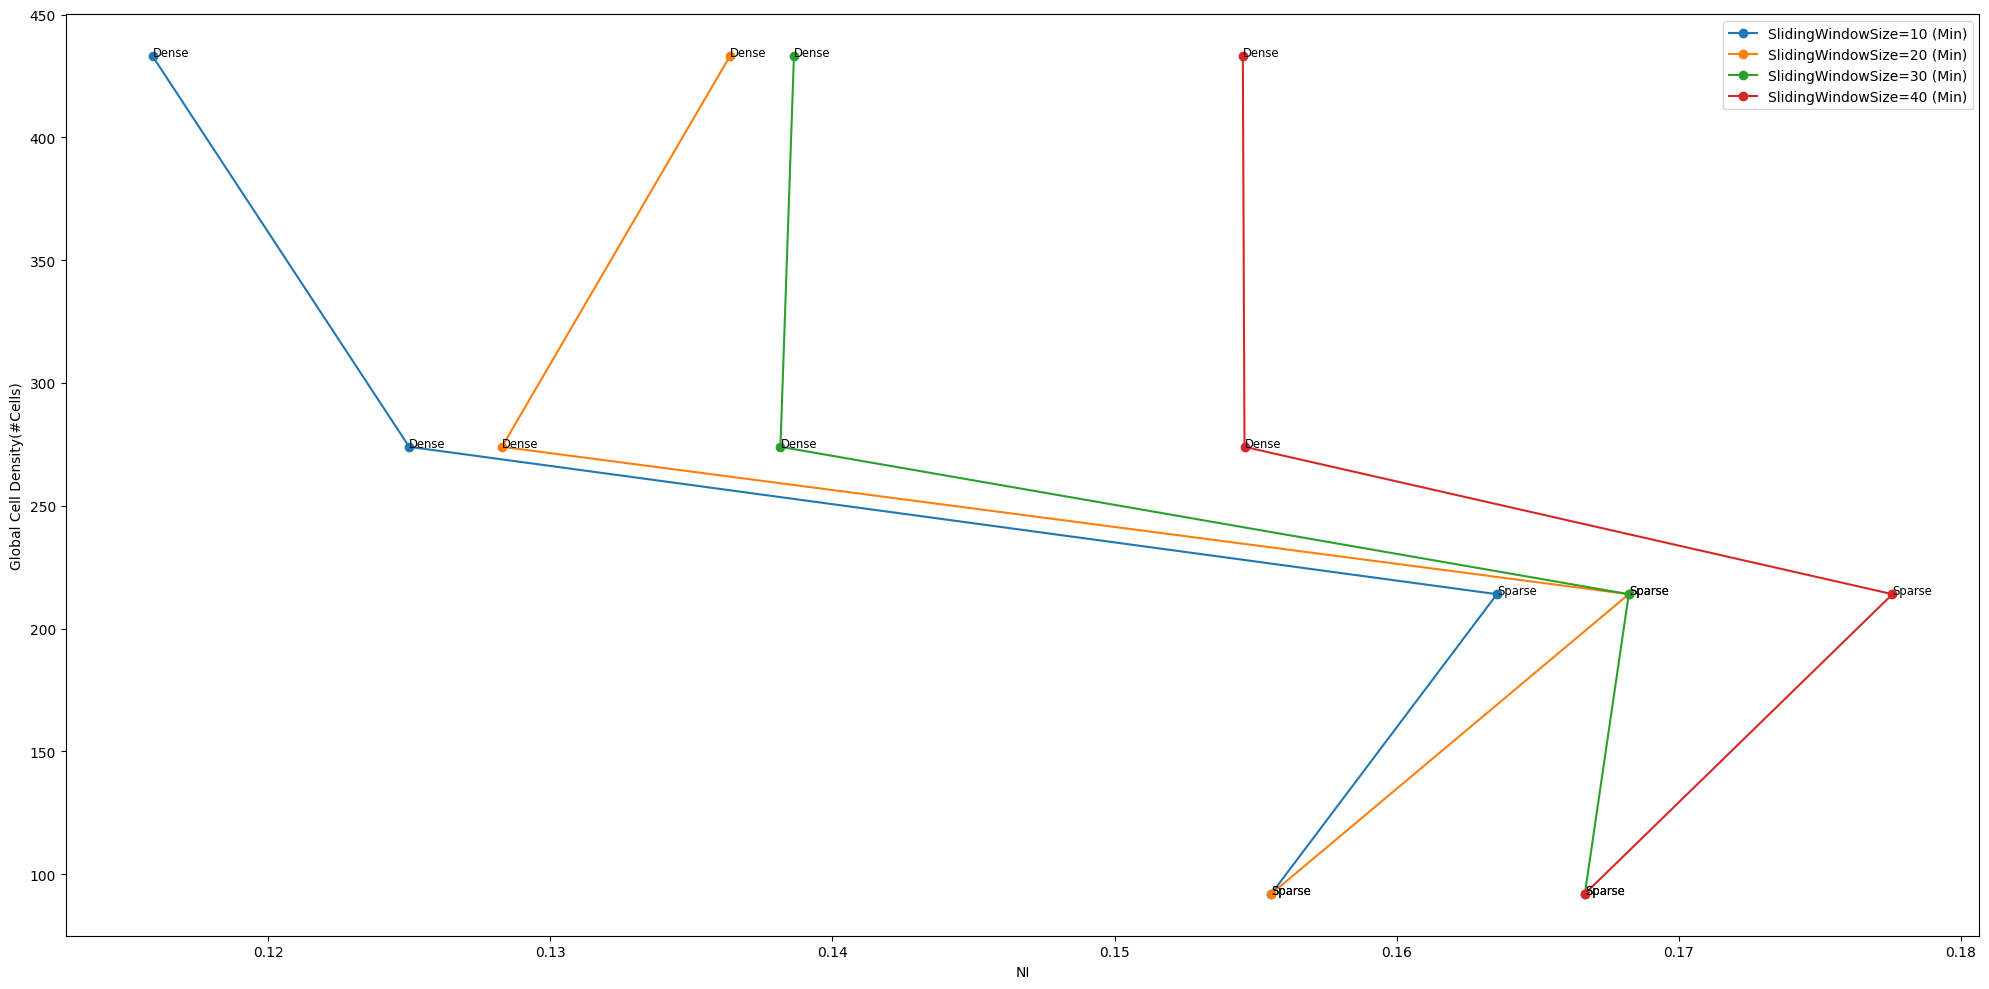

In [7]:
only_recent_death_flag_for_neighbors_calc = False
# sliding_time_window_size = 20
neighbors_dist_threshold = 250
exps_dir_name_new = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"

meta_data_file_full_path ="/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/2023ExperimentsMetaData.csv"
exp_names = list(exp_names_new)
meta_data_df = pd.read_csv(meta_data_file_full_path)
fig, axis = plt.subplots(figsize=(20, 10))
exp_density_levels_by_exp_name = {}
for sliding_time_window_size in (10, 20, 30, 40):
    p_nucs_by_exp_name = {}
    global_density_by_exp_name = {}
    for exp_name in exp_names:
        exp_density_levels_by_exp_name[exp_name] = 'Dense' if 'dense' in exp_name.lower() else 'Sparse'
        print(f"Analyzing exp: {exp_name}")
        file_full_path = os.path.join(exps_dir_name_new, exp_name)
        p_nuc_by_time, p_prop_by_time, p_nuc_global, p_prop_global, \
                all_frames_nucleators_mask, all_frames_propagators_mask, \
                accumulated_fraction_of_death_by_time = \
                    calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_explicit_temporal_resolution(
                        single_exp_full_path=file_full_path,
                        dist_threshold = neighbors_dist_threshold,
                        sliding_time_window_size=sliding_time_window_size,
                        only_recent_death_flag_for_neighbors_calc=only_recent_death_flag_for_neighbors_calc,
                    meta_data_path=meta_data_file_full_path)
        print(f"NI: {p_nuc_global}\n{'#'*30}")
        exp_meta_data = meta_data_df[meta_data_df['File Name'] == exp_name]
        global_density_by_exp_name[exp_name] = exp_meta_data['Density(#Cells)'].values[0]
        p_nucs_by_exp_name[exp_name] = p_nuc_global

    sorted_values = list(zip(*list(sorted(zip(list(global_density_by_exp_name.values()), list(p_nucs_by_exp_name.values()))))))
    axis.plot(sorted_values[1], sorted_values[0], label=f"SlidingWindowSize={sliding_time_window_size} (Min)", marker='o')#, linestyle='None'
    for exp_name, exp_density_tag in exp_density_levels_by_exp_name.items():
        exp_density, exp_p_nuc = global_density_by_exp_name[exp_name], p_nucs_by_exp_name[exp_name]
        print(exp_density, exp_p_nuc, exp_density_tag)
        axis.text(exp_p_nuc, exp_density, exp_density_tag, {'fontsize': 'small'})

plt.legend()
plt.xlabel("NI")
plt.ylabel("Global Cell Density(#Cells)")
plt.tight_layout()
plt.show()

#### investigating effects of neighbors distance threshold-NI

Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.12828947368421054
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
NI: 0.17289719626168223
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
NI: 0.2722222222222222
##############################
Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.13863636363636364
##############################
274 0.12828947368421054 Dense
214 0.17289719626168223 Sparse
92 0.2722222222222222 Sparse
433 0.13863636363636364 Dense
Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.12828947368421054
####################

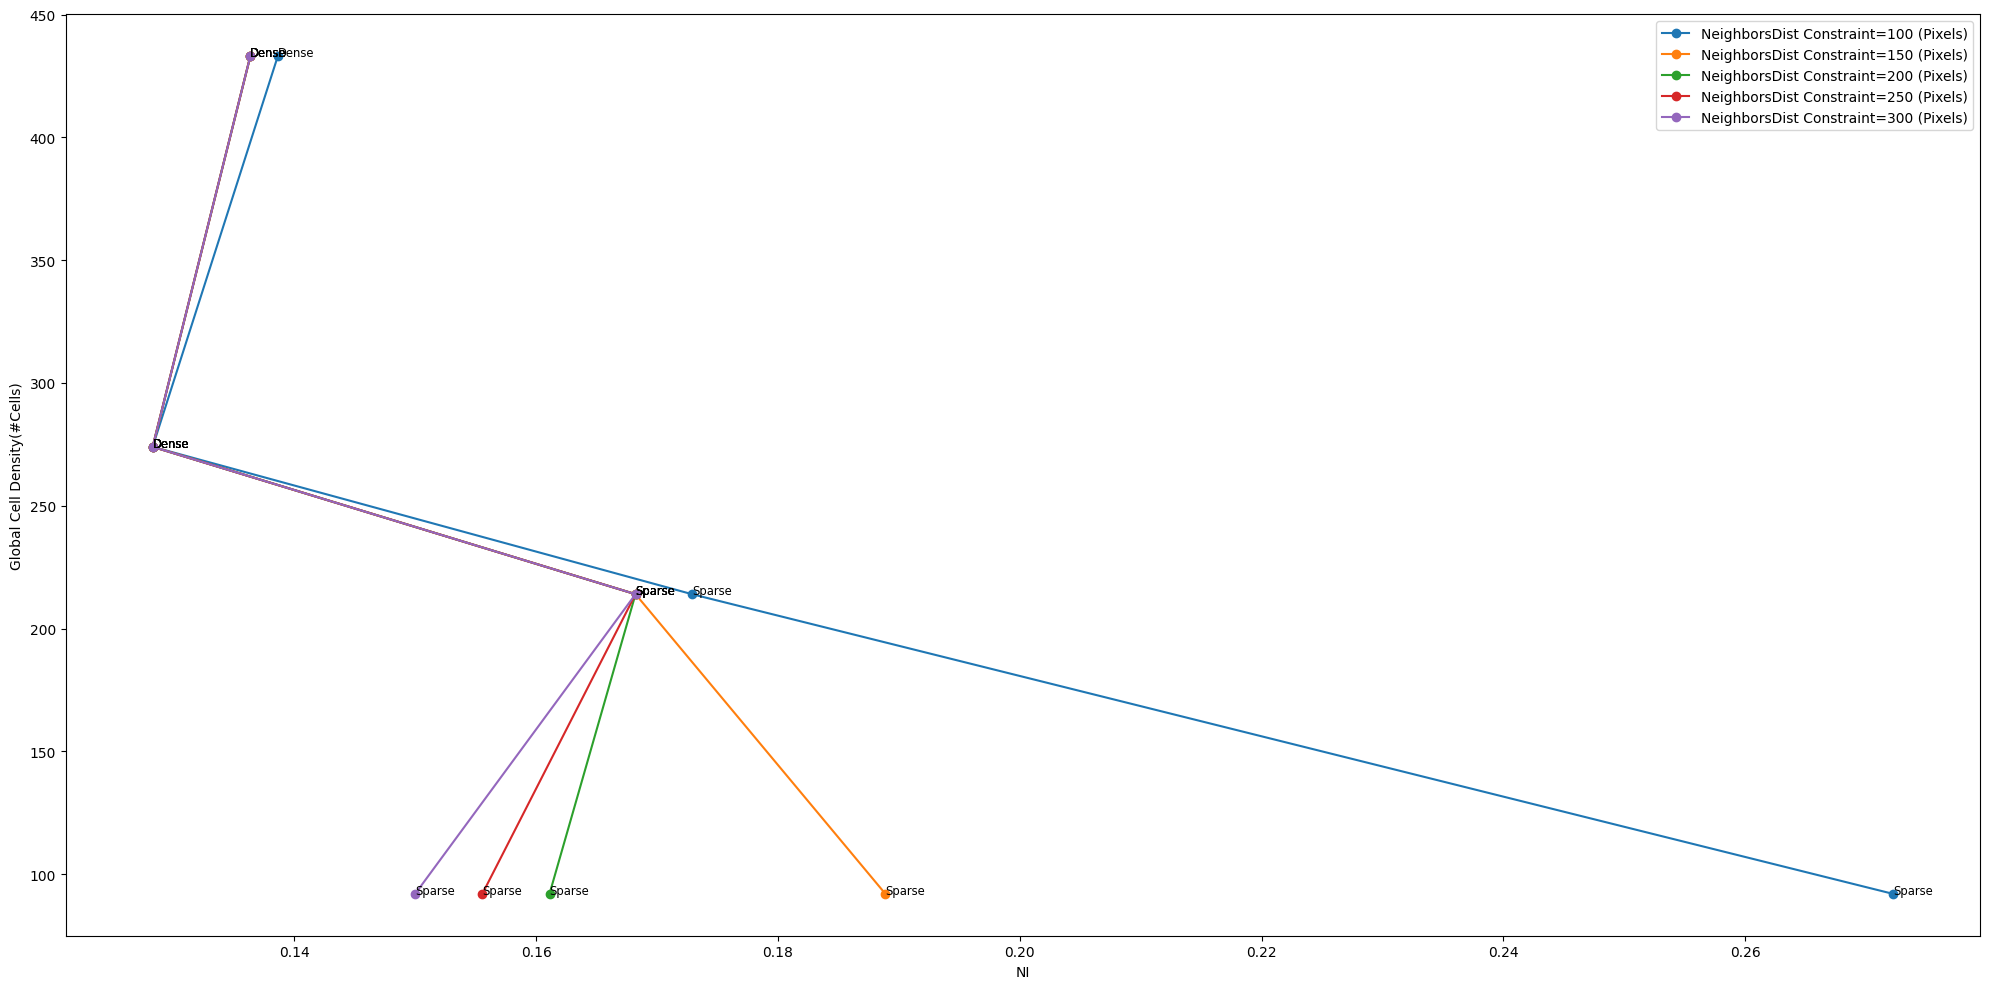

In [8]:
only_recent_death_flag_for_neighbors_calc = False
sliding_time_window_size = 20
# neighbors_dist_threshold = 250
meta_data_file_full_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
exps_dir_name_new = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"

"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/2023ExperimentsMetaData.csv"
meta_data_df = pd.read_csv(meta_data_file_full_path)
fig, axis = plt.subplots(figsize=(20, 10))
exp_density_levels_by_exp_name = {}
exp_names = list(exp_names_new)
for neighbors_dist_threshold in (100, 150, 200, 250, 300):
    p_nucs_by_exp_name = {}
    global_density_by_exp_name = {}
    for exp_name in exp_names:
        exp_density_levels_by_exp_name[exp_name] = 'Dense' if 'dense' in exp_name.lower() else 'Sparse'
        print(f"Analyzing exp: {exp_name}")
        file_full_path = os.path.join(exps_dir_name_new, exp_name)
        p_nuc_by_time, p_prop_by_time, p_nuc_global, p_prop_global, \
                all_frames_nucleators_mask, all_frames_propagators_mask, \
                accumulated_fraction_of_death_by_time = \
                    calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_explicit_temporal_resolution(
                        single_exp_full_path=file_full_path,
                        dist_threshold = neighbors_dist_threshold,
                        sliding_time_window_size=sliding_time_window_size,
                        only_recent_death_flag_for_neighbors_calc=only_recent_death_flag_for_neighbors_calc,
                    meta_data_path=meta_data_file_full_path)
        print(f"NI: {p_nuc_global}\n{'#'*30}")
        exp_meta_data = meta_data_df[meta_data_df['File Name'] == exp_name]
        global_density_by_exp_name[exp_name] = exp_meta_data['Density(#Cells)'].values[0]
        p_nucs_by_exp_name[exp_name] = p_nuc_global

    sorted_values = list(zip(*list(sorted(zip(list(global_density_by_exp_name.values()), list(p_nucs_by_exp_name.values()))))))
    axis.plot(sorted_values[1], sorted_values[0], label=f"NeighborsDist Constraint={neighbors_dist_threshold} (Pixels)", marker='o')#, linestyle='None'
    for exp_name, exp_density_tag in exp_density_levels_by_exp_name.items():
        exp_density, exp_p_nuc = global_density_by_exp_name[exp_name], p_nucs_by_exp_name[exp_name]
        print(exp_density, exp_p_nuc, exp_density_tag)
        axis.text(exp_p_nuc, exp_density, exp_density_tag, {'fontsize': 'small'})
plt.xlabel("NI")
plt.ylabel("Global Cell Density(#Cells)")
plt.legend()
plt.tight_layout()
plt.show()

#### investigating effects of sliding time window size -NRF

In [ ]:

all_data_dir = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
experiments_main_dir_path = all_data_dir
meta_data_file_path =  "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"# os.path.join(all_data_dir, '2023ExperimentsMetaData.csv')
root_results_dir = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/NewResults/NRF_1000_pertupation"
for sliding_time_window_size in (10, 15, 20, 30): #
    print(f"calculating NRF with sliding time window: {sliding_time_window_size}")
    dir_path_to_save_nrf_plots = os.path.join(
        root_results_dir,
        f"sliding_time_window_{sliding_time_window_size}" if sliding_time_window_size is not None else f"no_sliding_time_window"
    )
    exps_results_dicts = calc_factor_of_propagation_by_number_of_dead_neighbors_and_time_from_recent_neighbors_death(
        dir_path_to_save_nrf_plots=dir_path_to_save_nrf_plots,
        exp_name=exp_names,
        exps_dir_path=experiments_main_dir_path,
        max_number_of_dead_neighbors_to_calc=5,
        max_delta_tod_from_recently_dead_neighbor=5,
        meta_data_full_file_path=meta_data_file_path,
        save_fig=True,
        show_fig=False,
        sliding_time_window_size=sliding_time_window_size,
        number_of_random_permutations=1000,
        include_only_treatments=['FAC'],
        fig_v_min=1.,
        fig_v_max=3.
    )

#### investigating effects of neighbors distance threshold-NRF

In [ ]:
root_results_dir = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/NewResults/NRF"
for neighbors_dist_threshold in (100, 150, 200, 250, 300): #
    print(f"calculating NRF with neighbors distance threshold: {neighbors_dist_threshold}")
    dir_path_to_save_nrf_plots = os.path.join(
        root_results_dir,
        f"neighbors_dist_threshold_{neighbors_dist_threshold}"
    )
    exps_results_dicts = calc_factor_of_propagation_by_number_of_dead_neighbors_and_time_from_recent_neighbors_death(
        dir_path_to_save_nrf_plots=dir_path_to_save_nrf_plots,
        exp_name=exp_names,
        exps_dir_path=experiments_main_dir_path,
        max_number_of_dead_neighbors_to_calc=5,
        max_delta_tod_from_recently_dead_neighbor=5,
        meta_data_full_file_path=meta_data_file_path,
        save_fig=True,
        show_fig=False,
        dist_threshold=neighbors_dist_threshold,
        sliding_time_window_size=15,
        number_of_random_permutations=1000,
        include_only_treatments=['FAC'],
        fig_v_min=1.,
        fig_v_max=3.
    )

# Death Propagation Spatial Extent

analyzing exp 20181227_MCF10A_SKT_xy1_compressed_to_30 | 1/134
analyzing exp 20181229_HAP1-920H_FB_GCAMP_xy46 | 2/134
analyzing exp 20160828_10Awt_FB_xy05 | 3/134
analyzing exp 20160828_10Awt_FB_xy04 | 4/134
analyzing exp 20181227_MCF10A_SKT_xy4_compressed_to_30 | 5/134
analyzing exp 20181229_HAP1-920H_FB+PEG1450_GCAMP_xy53_compressed_to_30 | 6/134
analyzing exp 20181229_HAP1-920H_FB_GCAMP_xy47 | 7/134
analyzing exp 20180905_U937_TSZ_xy9 | 8/134
analyzing exp 20181229_HAP1-920H_FB_GCAMP_xy50 | 9/134
analyzing exp 20181229_HAP1-920H_FB+PEG3350_GCAMP_xy57 | 10/134
analyzing exp 20180620_HAP1_erastin_xy8 | 11/134
analyzing exp 20160909_b16f10_aMSH_xy38 | 12/134
analyzing exp 20160828_10Awt_FB_xy03 | 13/134
analyzing exp 20160828_10Awt_FB_xy02 | 14/134
analyzing exp 20181229_HAP1-920H_FB+PEG3350_GCAMP_xy59_compressed_to_30 | 15/134
analyzing exp 20180620_HAP1_erastin_xy9 | 16/134
analyzing exp 20181229_HAP1-920H_FB+PEG3350_GCAMP_xy56 | 17/134
analyzing exp 20180514_HAP1_FB_xy3_compressed_t

<Figure size 640x480 with 0 Axes>

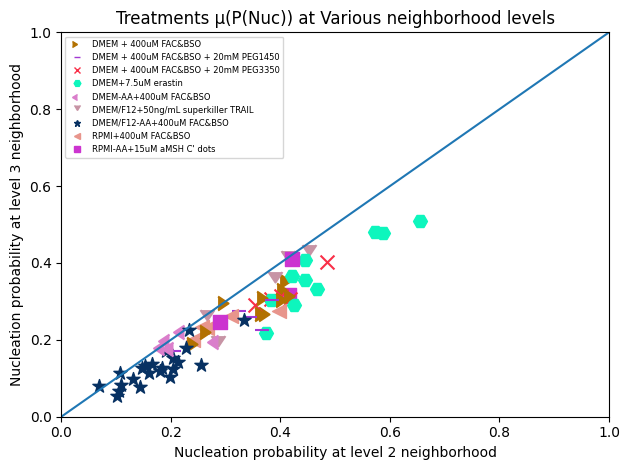

<Figure size 640x480 with 0 Axes>

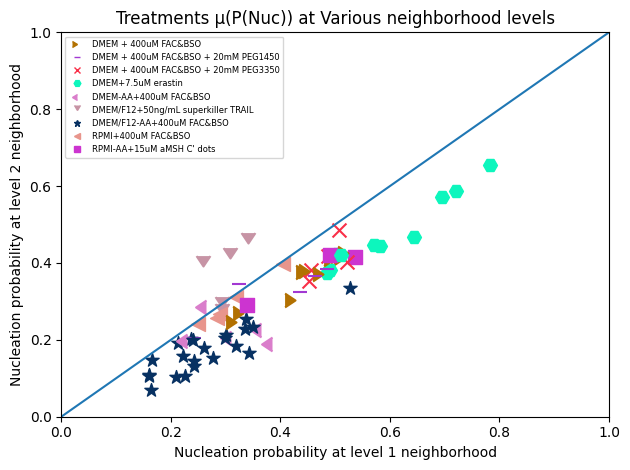

<Figure size 640x480 with 0 Axes>

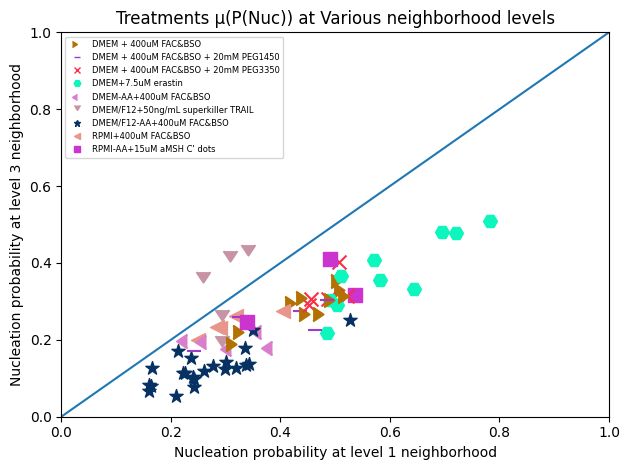

In [ ]:
from QuantificationScripts.CalcNucleatorsInVaryingNeighborLevels import *
main_exp_dir_full_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/"
kwargs = {'plot_mean_of_means': False}
calc_pnuc_at_varying_distances_of_neighbors_multiple_exps(main_exp_dir_full_path,
                                                            limit_exp_num=float('inf'),
                                                            **kwargs)